In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframes = []

In [3]:
# Get a list of all CSV files in the current directory
csv_files = glob.glob('open-data_aww-*.csv')

# Loop through the files and read them into dataframes
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Combine the dataframes into one
combined_data = pd.concat(dataframes, ignore_index=True)

In [4]:
# Display the first few rows of the dataset
combined_data.head()

,Month Observed,Year Observed,Species,Latitude,Longitude
0,January,2016,"Deer, White-Tailed",57.147963,-111.587578
1,January,2016,"Deer, White-Tailed",56.800923,-111.435825
2,January,2016,"Deer, White-Tailed",55.172016,-112.480026
3,January,2016,"Deer, White-Tailed",56.392280,-111.443014
4,January,2016,Duck/Goose/Swan,56.711200,-111.385400


In [5]:
# Checking the column names in the DataFrame 
print(combined_data.columns)

Index([' Month Observed', ' Year Observed', ' Species', ' Latitude',
       ' Longitude'],
      dtype='object')


In [6]:
# Remove leading and trailing white spaces from all column names
combined_data.columns = combined_data.columns.str.strip()

# Exploratory Data Analysis

In [7]:
# Starting off by computing basic summary statistics Latitude and Longitude
# This could provide valuable insights about the geographic distribution of wildlife-vehicle collisions
print(combined_data[['Latitude', 'Longitude']].describe())

# mean represents average geographic location of the incidents
# standard deviation could help indicate the spread or variability of incidents from the mean
# min/max values would represent the range of Latitudes/Longitudes where incidents occurred
# This information could be useful for spatial analysis and visualization, helping identify hotspots or trends in the data.

           Latitude     Longitude
count  30708.000000  30708.000000
mean      52.087727   -113.754848
std        1.851877      1.863956
min       49.003684   -119.997728
25%       50.735407   -114.375951
50%       52.026814   -113.651903
75%       53.569995   -112.666804
max       59.214230   -110.012259


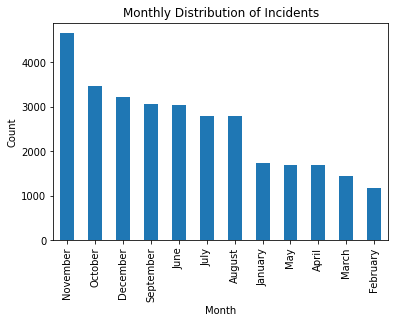

In [8]:
# Calculate the count of incidents for each month
monthly_counts = combined_data['Month Observed'].value_counts()

# Create a bar plot to visualize the monthly distribution of incidents
monthly_counts.plot(kind='bar')

# Add a title and labels to the plot
plt.title('Monthly Distribution of Incidents')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

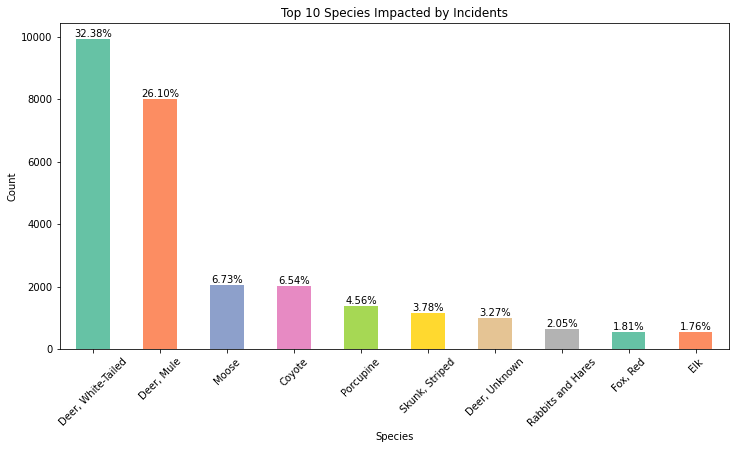

In [9]:
"""
Next visualizing the top 10 species impacted by incidents in a bar chart. 
The count of incidents for each species are shown along with the percentage of each species relative 
to the total observations above the bars for better insight into the data.

"""

# Calculate the count of incidents for each species
species_counts = combined_data['Species'].value_counts()

# Select the top 10 species by incident count
top_10_species = species_counts.head(10)

# Calculate the total number of observations (total species count)
total_observations = len(combined_data)

# Calculate the percentage of each species with respect to the total observations
species_percentage = (top_10_species / total_observations) * 100

# Set a custom color palette
custom_colors = sns.color_palette("Set2")

# Create a larger bar plot to visualize the top 10 impacted species with percentages
plt.figure(figsize=(12, 6))  # Adjust the figure size for better readability
ax = top_10_species.plot(kind='bar', color=custom_colors)
plt.title('Top 10 Species Impacted by Incidents')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Display the percentage on a separate line above the bar
for i, val in enumerate(top_10_species):
    ax.text(i, val + 5, f"{species_percentage[i]:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.show()

<Figure size 1008x576 with 0 Axes>

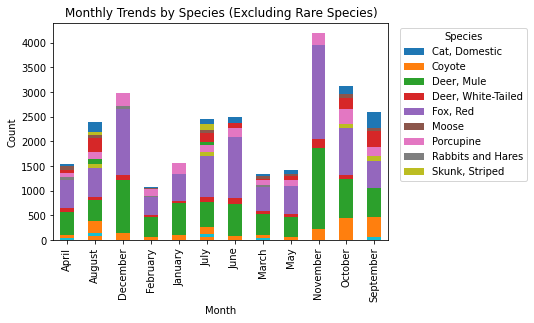

In [10]:
# Group the data by month and species to count occurrences
monthly_species_counts = combined_data.groupby(['Month Observed', 'Species']).size().unstack().fillna(0)

# Calculate the total count of incidents for each month
monthly_total_counts = monthly_species_counts.sum(axis=1)

# Determine the threshold (2% of the total count)
threshold = 0.02 * monthly_total_counts

# Exclude species that make up less than 1% of the total count for a month
for month in monthly_species_counts.index:
    species_counts = monthly_species_counts.loc[month]
    species_counts[species_counts < threshold[month]] = 0

# Create a larger stacked bar chart to visualize species by month
plt.figure(figsize=(14, 8))
ax = monthly_species_counts.plot(kind='bar', stacked=True)
plt.title('Monthly Trends by Species (Excluding Rare Species)')
plt.xlabel('Month')
plt.ylabel('Count')

# Filter and display only relevant species names in the legend
relevant_species = [species for species in species_counts.index if species_counts[species].sum() > 0]

# Specify the legend location and size
plt.legend(title='Species', labels=relevant_species, bbox_to_anchor=(1.02, 1), loc='upper left', prop={'size': 10})

plt.show()